<center><h2><b>9. Interpolation of a quasar spectrum</b></h2></center>
<center><h4>Code Author: Pratiksha Balasaheb Gaikwad</h4></center>
<hr style="height:2px;border-width:0;color:orange;background-color:orange">
<hr style="height:2px;border-width:0;color:blue;background-color:blue">


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, factorial, pi, log
from scipy.interpolate import interp1d


<center><h4><b>Interpolation of a quasar spectrum</b></h4></center>

In [2]:
# Read data from input file
# freq_data == Column 1 --> Unit = log_10 Hz
# lum_data == column 2 --> Unit = log_10 W
freq_data, lum_data = np.loadtxt("quasar_spectrum.txt", usecols = (0,1), unpack ="True")
#print(lum_data)

(a) Write a program that can perform interpolation of a data set using either
- your own linear interpolation algorithm, or
- a pre-existing cubic spline interpolation algorithm (using e.g. the interp1d
function from scipy.interpolate, with the ‘cubic’ keyword)

**<center><b>ANSWER of Q. a)</b></center>**

In [3]:
def interpolate(x,y,newx,key):
    '''
    Interpolates over given input data points & returns new y-values.
    
    Inputs:
    x-values from old data (array x)
    y-values from old data (array y)
    new x-values at which we want to find y (array newx)
    keyword for type of interpolation (key : linear or cubic)
    
    Returns:
    Array of corresponding new y-values.    
    '''
    if key == "linear":
        # calculate new y values using linear interpolation:
        linear_f = interp1d(x,y)
        newy_lin = linear_f(newx)
        return newy_lin
    elif key == 'cubic':
        # calculate new y values using cubic interpolation:
        cubic_f = interp1d(x,y,kind='cubic')
        newy_cubic = cubic_f(newx)
        return newy_cubic

(b) Use each of these methods (linear and cubic spline interpolation) in turn to in-
terpolate the data from the file quasar_spectrum.txt that we used in Home-
work #3, generating a new data set in each case that has 10 times smaller
frequency spacing.

**<center><b>ANSWER of Q. b)</b></center>**

In [4]:

#freq_data : an array of given frequency values
freq_min, freq_max = min(freq_data), max(freq_data)
print(f"\nFor given frequency values (min, max) = ({freq_min}, {freq_max}).\n")

old_spacing = freq_data[2]-freq_data[1] #frequency spacing
print(f"\nGiven data has frequency spacing of {old_spacing:.2f} log10 Hz.")


For given frequency values (min, max) = (12.52, 18.42).


Given data has frequency spacing of 0.02 log10 Hz.


In [5]:
new_spacing = float(f"{old_spacing:.2f}")/10
print("\nSpacing for new data = ", new_spacing)


Spacing for new data =  0.002


In [6]:
methods = ["linear","cubic"]

# The new grid points where we want to know y:
new_freq = np.arange(freq_min,freq_max-new_spacing, new_spacing)
# subtracting new_spacing from max limit of range to accomodate points in interpolation function
# otherewise it is giving at old freq_max


print(f"\n----------New luminosity data-------------\n")
newy_lin = interpolate(freq_data, lum_data, new_freq, 'linear')
print(f"\nusing linear interpolation \n= {newy_lin}\n")
    
newy_cub = interpolate(freq_data, lum_data, new_freq, 'cubic')
print(f"\nusing cubic interpolation \n= {newy_cub}\n")
    




----------New luminosity data-------------


using linear interpolation 
= [37.49  37.495 37.5   ... 37.26  37.26  37.26 ]


using cubic interpolation 
= [37.49       37.49553672 37.50090395 ... 37.26       37.26
 37.26      ]



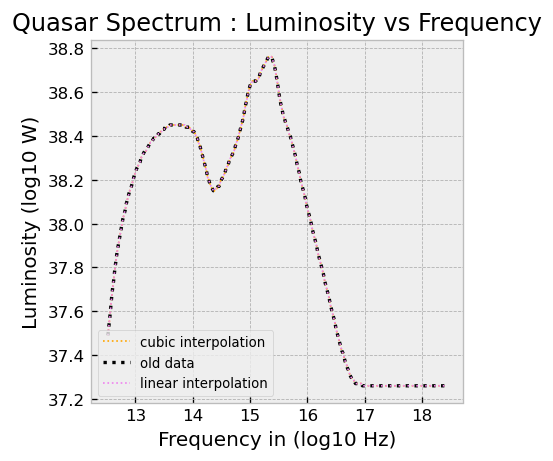

In [12]:
# Plot of the Quasar Spectrum
plt.figure(figsize=(4,4), dpi=120)
plt.plot(new_freq,newy_cub, color ='orange', linestyle=':', label='cubic interpolation',linewidth = 1)

plt.plot(freq_data,lum_data, color ='black', linestyle=':', label="old data",
         linewidth = 2)
plt.plot(new_freq,newy_lin, color ='violet', linestyle=':', label = "linear interpolation",
         linewidth = 1)
plt.style.use('bmh')
plt.xlabel('Frequency in (log10 Hz)')
plt.ylabel('Luminosity (log10 W)')
plt.legend(loc="best", fontsize=8)
plt.title('Quasar Spectrum : Luminosity vs Frequency')
plt.show()

(c) For each interpolated data set, use your trapezoidal integration routine from
Homework #3 to calculate the total luminosity of the quasar. Compare both results to results from trapezoidal routine coded previously, as well as the exact answer $(L_{tot,exact} = 2.195102 ×10^{39} W)$.

**<center><b>ANSWER of Q. c)</b></center>**

In [8]:
def trapezoidal(new_freq, newy,h,exact, f, verbose="True"):
    s = 0

    for k in range(new_freq.size-1):
        s += newy[k]
    result = h*(0.5*(f(newy[0])+f(newy[newy.size-1])) + s)
    rel_err = np.abs((exact-result)/exact)

    if verbose:
        print(f"\tIntegral with trapezoid rule: {result}")
        print(f"\tRel. error {rel_err} with {new_freq.size} bins.")
        
    return result, rel_err 

In [9]:
def lum_func(freq):
    '''
    This is a function for integration. It takes,
        val : luminosity value from the data (unit: log10 W)
    as an input and returns 
        f_val : 10 to the power of input value then multiplied with natural log.    
    '''
    f_val = 10**(freq)*log(10)
    return f_val

In [10]:
# Loading all given data in one single array
data = np.loadtxt("quasar_spectrum.txt", usecols = (0,1), unpack ="True") 

# Given total luminosity of the quasar
L_exact = 2.195102e+39 # Unit =  W 



#-------------- Trapezoidal rule for integration using data from 


### Old data values: freq_data, lum_data
print("\nFrom OLD given data:")
result_old, erel_old = trapezoidal(freq_data, lum_data, float(f"{old_spacing:.2f}"), L_exact, lum_func, verbose=True) 

### (1) linear interpolation
# newy_lin : passing array of new y values
print("\nFor data from LINEAR INTERPOLATION:")
result_lin, erel_lin = trapezoidal(new_freq, newy_lin, new_spacing, L_exact, lum_func, verbose=True) 


### (2) Cubic Spline Interpolation
# newy_cub : passing array of new y values
print("\nFor data from CUBIC SPLINE INTERPOLATION:")
result_cub, erel_cub = trapezoidal(new_freq, newy_cub, new_spacing, L_exact, lum_func, verbose=True) 



From OLD given data:
	Integral with trapezoid rule: 1.1305684266597208e+36
	Rel. error 0.9994849585911453 with 296 bins.

For data from LINEAR INTERPOLATION:
	Integral with trapezoid rule: 1.1305684266597208e+35
	Rel. error 0.9999484958591145 with 2950 bins.

For data from CUBIC SPLINE INTERPOLATION:
	Integral with trapezoid rule: 1.1305684266597138e+35
	Rel. error 0.9999484958591145 with 2950 bins.


<center><b>Printing Comparison results for Trapezoidal Rule</b></center>

In [11]:
print("Data Used \t\t Integral Value \t\t Rel. error wrt. exact \t\t Rel. error wrt. OLD\n")
print(f"OLD \t\t {result_old} \t\t {erel_old} \t\t  \n")
print(f"Linear \t\t {result_lin} \t\t {erel_lin} \t\t {abs((result_old - result_lin)/result_old)}\n")
print(f"Cubic \t\t {result_cub} \t\t {erel_cub} \t\t {abs((result_old - result_cub)/result_old)}\n")



Data Used 		 Integral Value 		 Rel. error wrt. exact 		 Rel. error wrt. OLD

OLD 		 1.1305684266597208e+36 		 0.9994849585911453 		  

Linear 		 1.1305684266597208e+35 		 0.9999484958591145 		 0.8999999999999999

Cubic 		 1.1305684266597138e+35 		 0.9999484958591145 		 0.9000000000000006

